In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('customer_retention_dataset.xlsx')

In [3]:
data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
data.drop(['4 What is the Pin Code of where you shop online from?','7 How do you access the internet while shopping on-line?','8 Which device do you use to access the online shopping?','9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ','10 What is the operating system (OS) of your device?\t\t\t\t                                          ','11 What browser do you run on your device to access the website?\t\t\t                                                          ','13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ','14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ','15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ','16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ','17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '],axis=1,inplace=True)
data.drop(['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ','12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ','Which of the Indian online retailer would you recommend to a friend?'],axis=1,inplace=True)

In [5]:
data.isnull().sum()

1Gender of respondent                                                                                         0
2 How old are you?                                                                                            0
3 Which city do you shop online from?                                                                         0
5 Since How Long You are Shopping Online ?                                                                    0
6 How many times you have made an online purchase in the past 1 year?                                         0
18 The content on the website must be easy to read and understand                                             0
19 Information on similar product to the one highlighted  is important for product comparison                 0
20 Complete information on listed seller and product being offered is important for purchase decision.        0
21 All relevant information on listed products must be stated clearly                                   

In [6]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guaran

In [7]:
util_val=['18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods','41 Monetary savings','47 Getting value for money spent',
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application','Availability of several payment options', 'Speedy order delivery ','Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before']

In [8]:
user_info=['1Gender of respondent',
 '2 How old are you? ',
 '3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?']

In [9]:
hed_val=[i for i in data.columns if i not in (util_val+user_info)]

In [10]:
data_num1=data.iloc[:,:35]
print(data_num1.columns)

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guaran

In [11]:
def value_count_viz(column):
    diff_count=len(data_num1[column].value_counts())
    if diff_count<5:
        plt.figure(figsize=(10,5))
    elif diff_count<10:
        plt.figure(figsize=(10,6))
    elif diff_count<20:
        plt.figure(figsize=(25,6))
    else:
        plt.figure(figsize=(20,6))
    sns.countplot(x=column,hue='1Gender of respondent',data=data_num1,orient='v')
    plt.show()

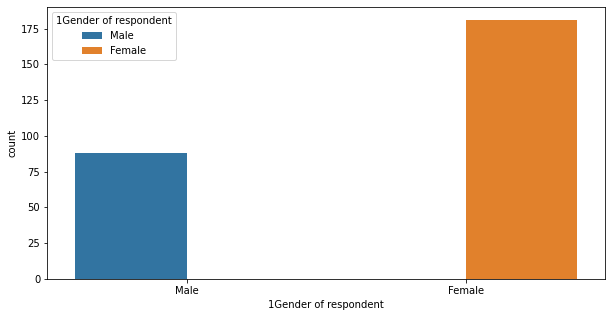

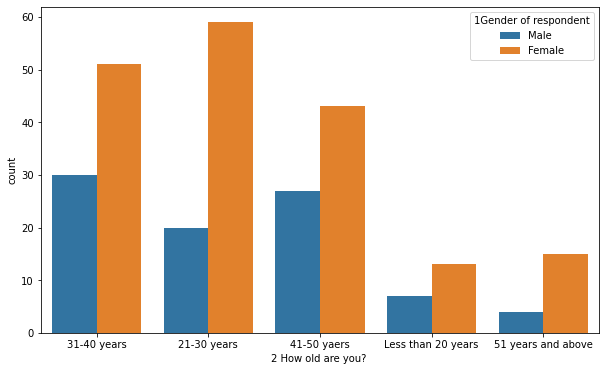

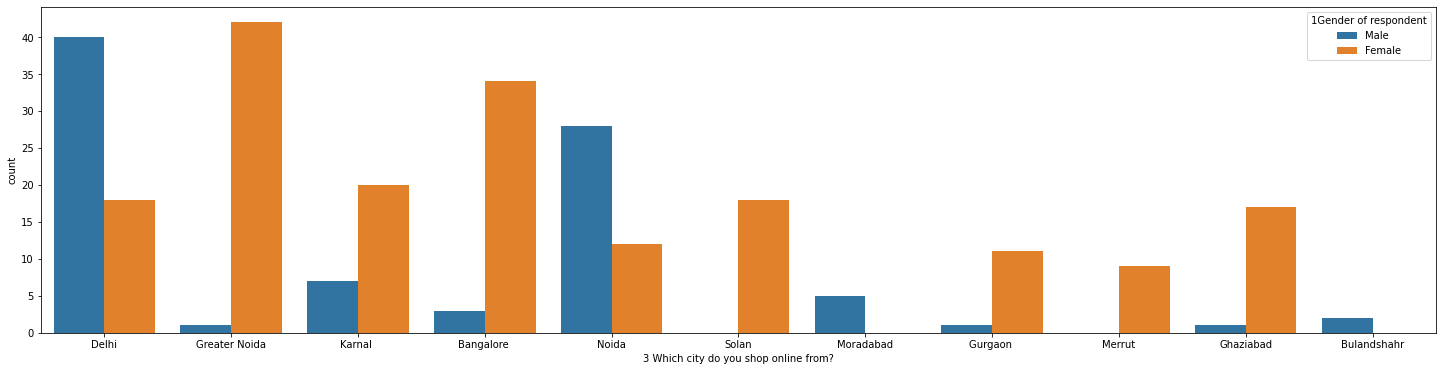

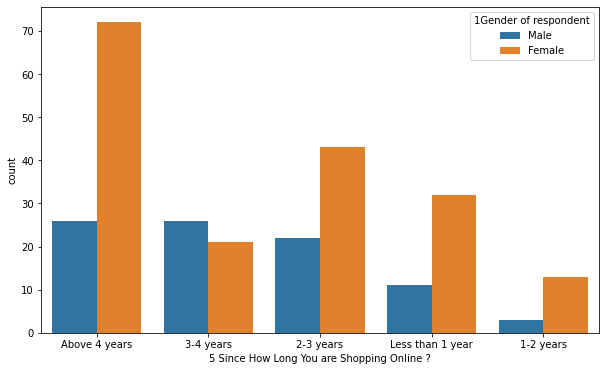

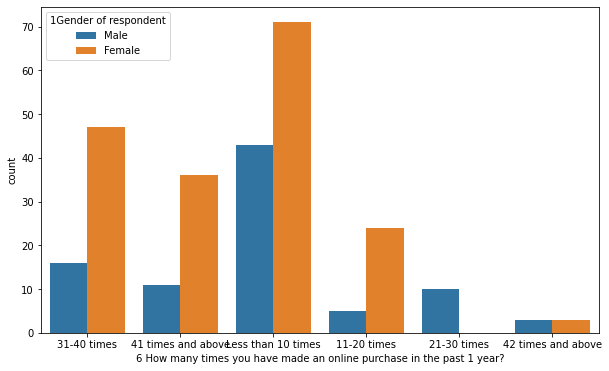

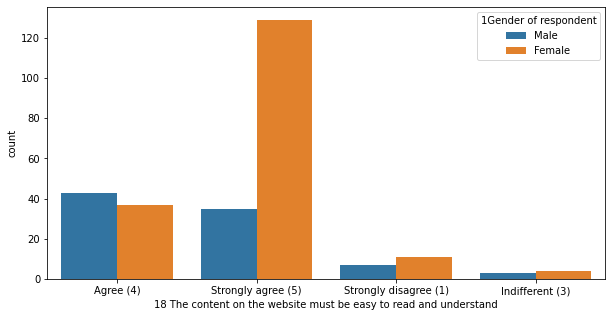

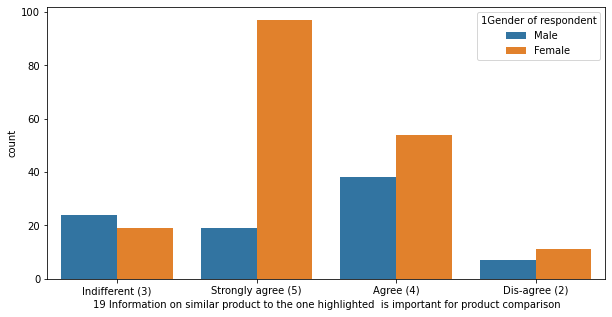

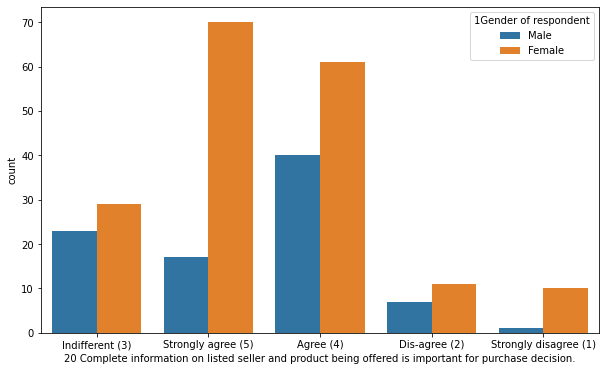

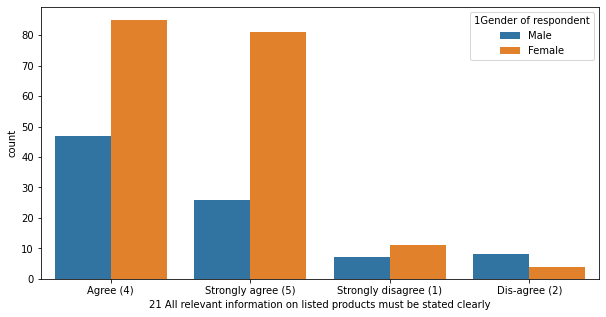

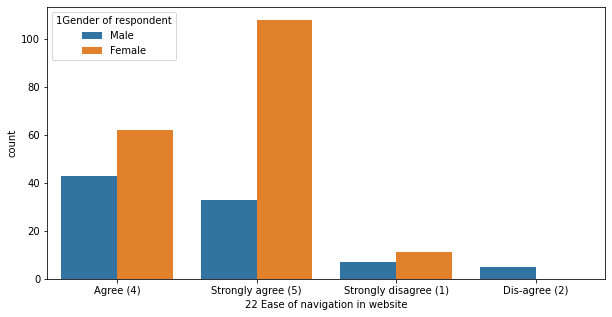

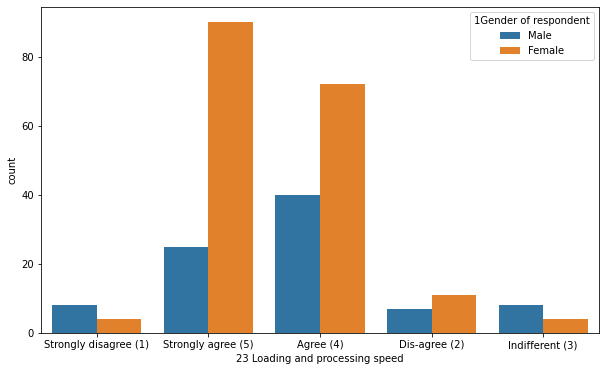

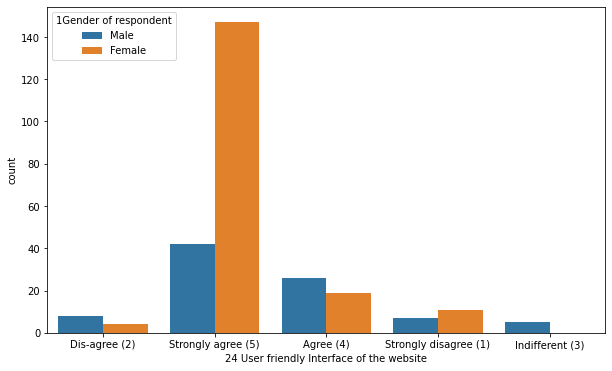

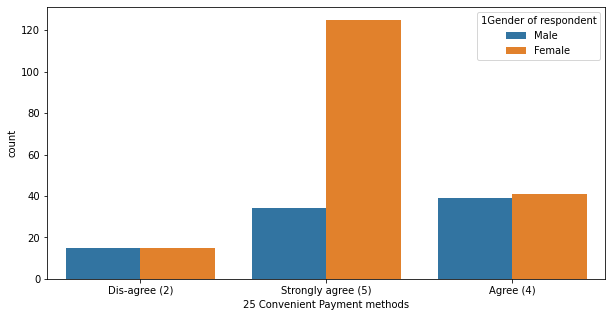

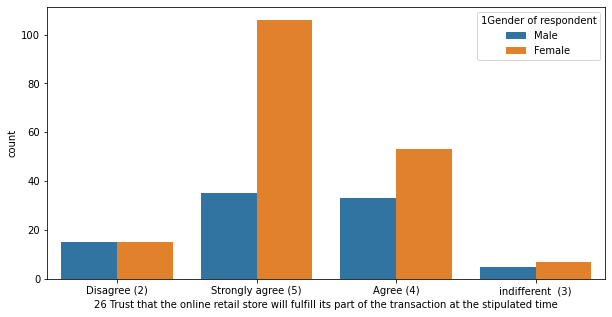

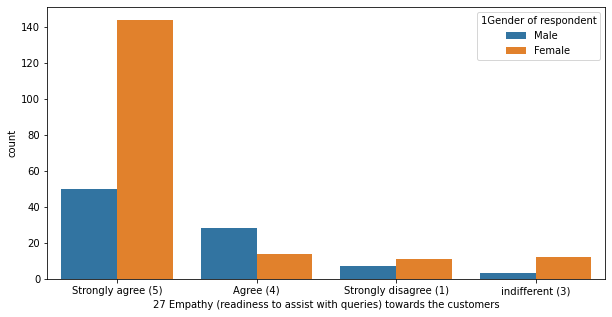

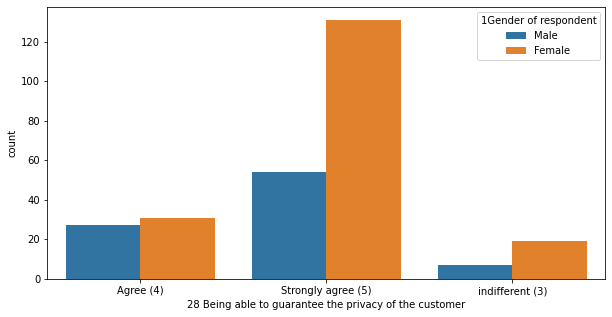

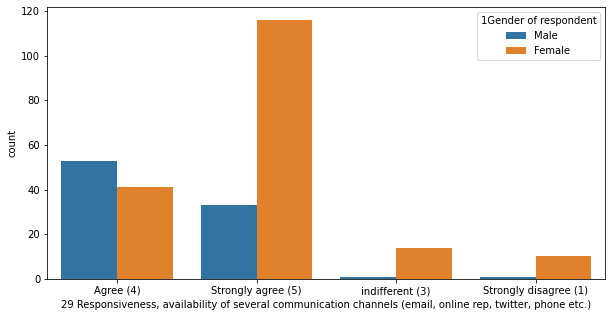

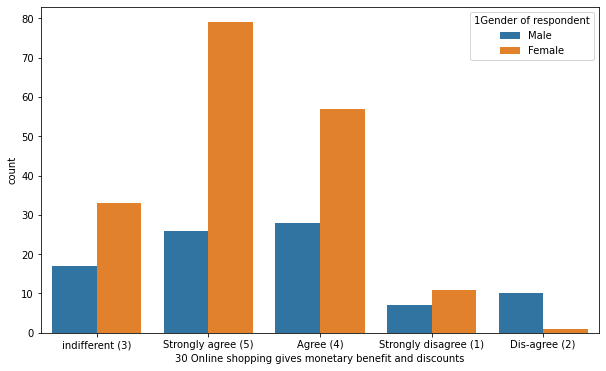

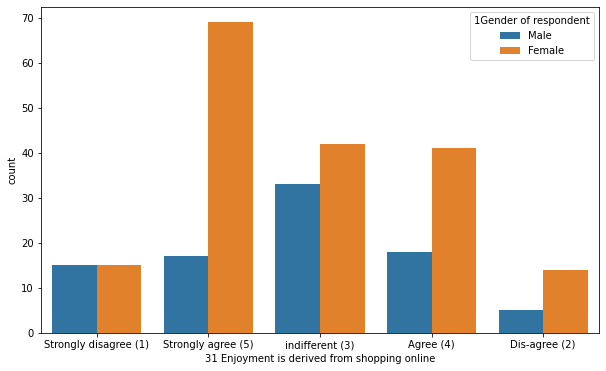

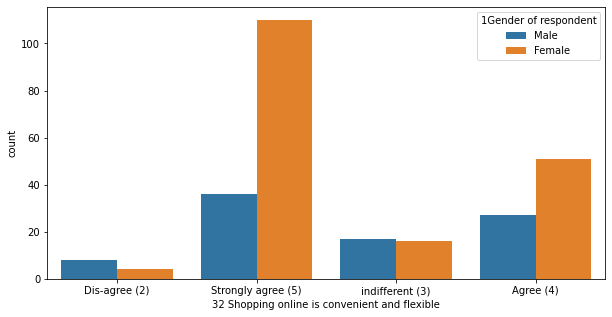

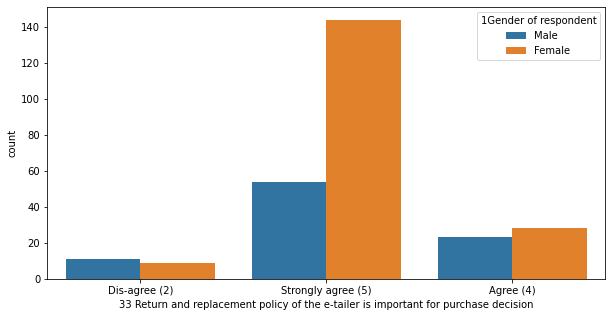

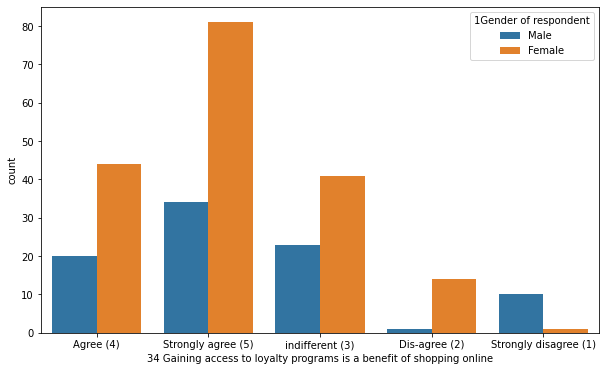

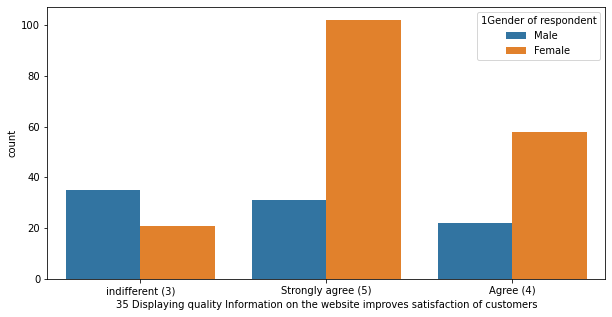

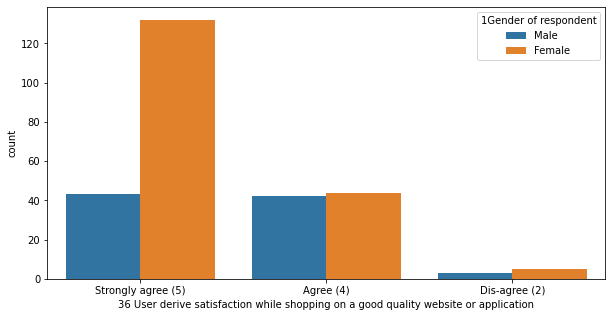

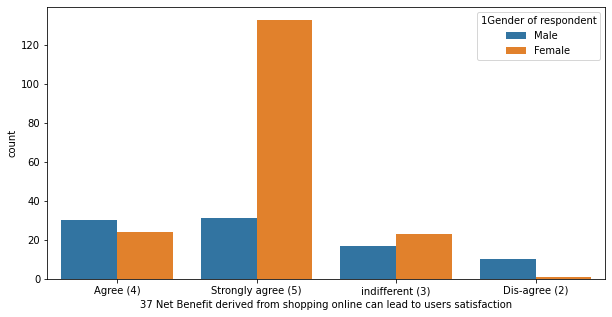

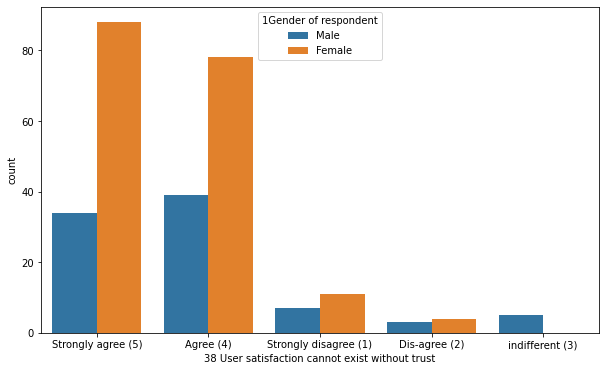

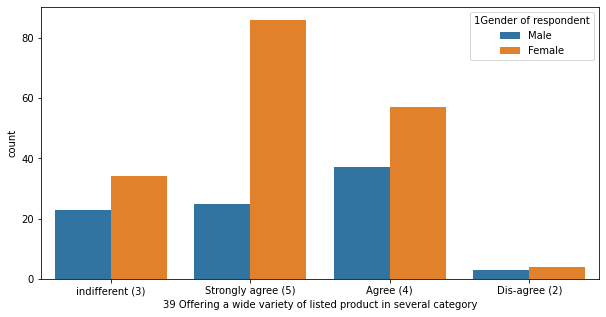

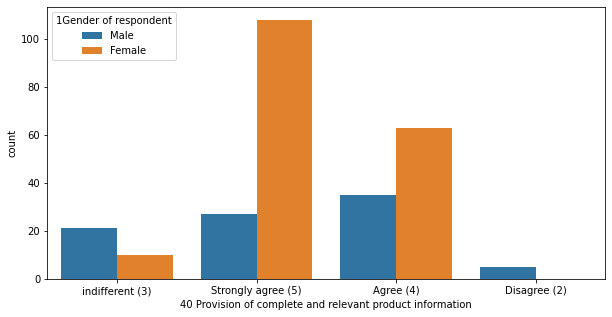

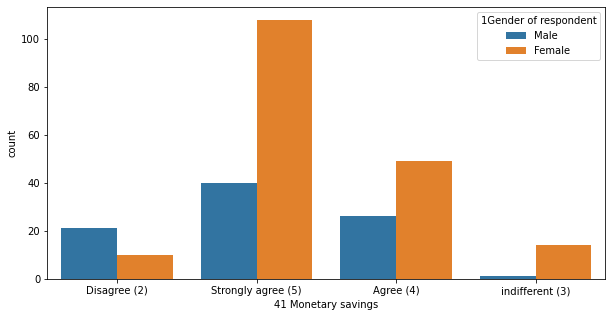

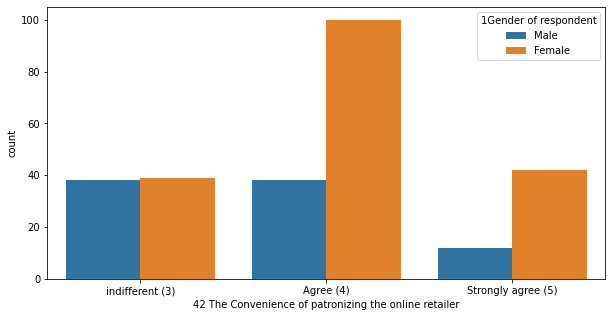

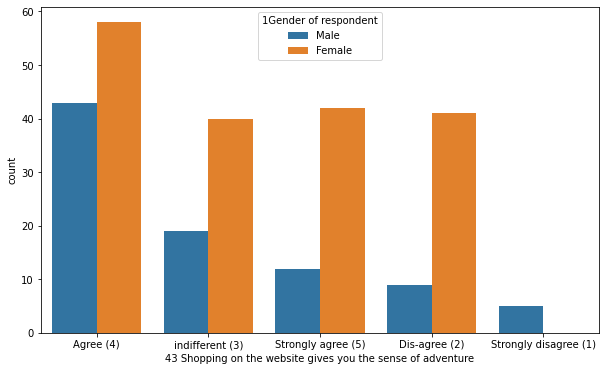

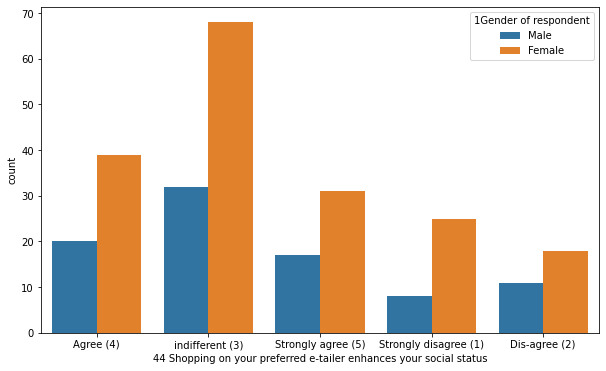

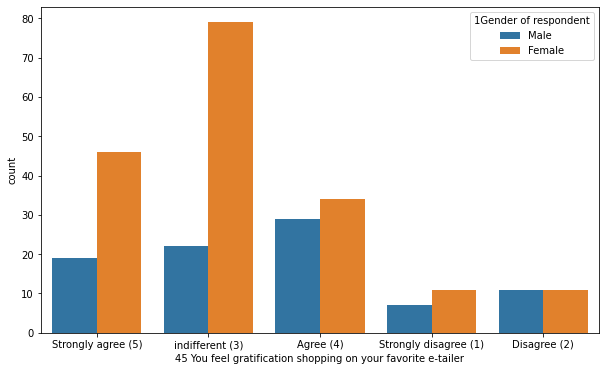

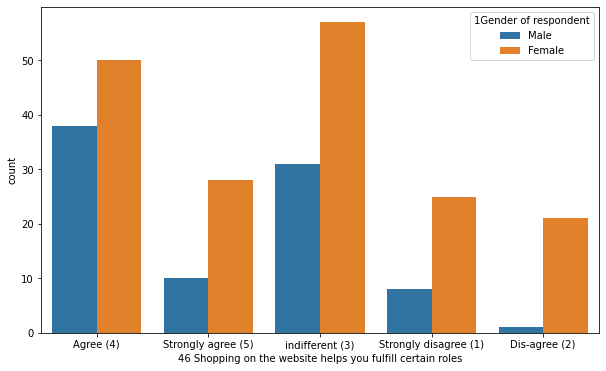

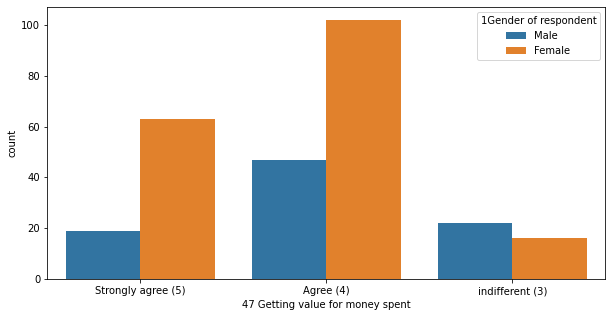

In [12]:
for i in data_num1.columns:
    value_count_viz(i)

In [13]:
data_enc=pd.read_excel('encoded_retention.xlsx')
data_enc.drop(['4 What is the Pin Code of where you shop online from?','7 How do you access the internet while shopping on-line?','8 Which device do you use to access the online shopping?','9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ','10 What is the operating system (OS) of your device?\t\t\t\t                                          ','11 What browser do you run on your device to access the website?\t\t\t                                                          ','13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ','14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ','15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ','16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ','17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '],axis=1,inplace=True)
data_enc.drop(['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ','12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ','Which of the Indian online retailer would you recommend to a friend?'],axis=1,inplace=True)

In [14]:
data_enc.corr()

,1Gender of respondent,2 How old are you?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
1Gender of respondent,1.000000,-0.034449,-0.046005,0.076121,0.166977,0.260724,0.079679,0.143320,0.167883,0.225080,...,0.097540,0.152595,0.357061,0.201673,0.198382,-0.005218,-0.046397,0.018482,-0.113160,0.202014
2 How old are you?,-0.034449,1.000000,0.014049,0.005089,-0.129724,-0.043793,-0.037330,-0.005868,-0.118419,-0.094518,...,-0.094664,0.035895,0.082622,-0.056316,0.035612,-0.002979,-0.176643,-0.203841,-0.121404,0.052869
5 Since How Long You are Shopping Online ?,-0.046005,0.014049,1.000000,0.291104,-0.037198,-0.015260,-0.238763,0.085921,0.023626,-0.086044,...,0.063752,0.006272,0.157118,-0.031713,-0.014764,0.111851,-0.026515,-0.047239,0.174400,0.175901
6 How many times you have made an online purchase in the past 1 year?,0.076121,0.005089,0.291104,1.000000,-0.002816,-0.063715,-0.044676,0.026065,-0.074205,-0.023053,...,0.025346,0.204100,0.193492,0.122437,0.047127,0.175364,-0.048847,-0.009571,0.057217,0.196359
18 The content on the website must be easy to read and understand,0.166977,-0.129724,-0.037198,-0.002816,1.000000,0.640067,0.487427,0.895727,0.772167,0.667206,...,0.888630,-0.030973,0.127371,-0.046987,-0.386348,-0.394869,0.242710,0.435072,0.398855,0.154706
19 Information on similar product to the one highlighted is important for product comparison,0.260724,-0.043793,-0.015260,-0.063715,0.640067,1.000000,0.493450,0.721075,0.856798,0.655942,...,0.524084,0.065143,0.376709,0.135002,-0.057613,-0.268791,0.442363,0.314825,0.508605,0.237717
20 Complete information on listed seller and product being offered is important for purchase decision.,0.079679,-0.037330,-0.238763,-0.044676,0.487427,0.493450,1.000000,0.421826,0.391440,0.380605,...,0.368845,0.137139,0.064152,-0.024535,-0.064987,-0.062826,0.342566,0.364385,0.437396,-0.131604
21 All relevant information on listed products must be stated clearly,0.143320,-0.005868,0.085921,0.026065,0.895727,0.721075,0.421826,1.000000,0.854726,0.679370,...,0.886664,-0.034033,0.204635,-0.098749,-0.390170,-0.313983,0.270080,0.375869,0.429328,0.261774
22 Ease of navigation in website,0.167883,-0.118419,0.023626,-0.074205,0.772167,0.856798,0.391440,0.854726,1.000000,0.655633,...,0.748693,-0.139863,0.168115,-0.004658,-0.215243,-0.233395,0.522068,0.531627,0.493510,0.284420
23 Loading and processing speed,0.225080,-0.094518,-0.086044,-0.023053,0.667206,0.655942,0.380605,0.679370,0.655633,1.000000,...,0.593157,0.238987,0.320857,0.174614,0.018449,-0.184805,-0.014131,0.124234,0.194052,0.123938


In [15]:
data_enc.corr()['1Gender of respondent']

1Gender of respondent                                                                                         1.000000
2 How old are you?                                                                                           -0.034449
5 Since How Long You are Shopping Online ?                                                                   -0.046005
6 How many times you have made an online purchase in the past 1 year?                                         0.076121
18 The content on the website must be easy to read and understand                                             0.166977
19 Information on similar product to the one highlighted  is important for product comparison                 0.260724
20 Complete information on listed seller and product being offered is important for purchase decision.        0.079679
21 All relevant information on listed products must be stated clearly                                         0.143320
22 Ease of navigation in website                